## 4.Modeling

This stage we apply the model on the dataset prepared on the last stage. First, we will make a simple baseline. The test data set doesn't have a target to check, we will utilize cross-validation on the training set for evaluation.

A)Baseline

For the baseline we will use the logistic regression and the cross-validation on the training set. At the end we also will submit the results on the kaggle with the test set. Let's start loading the data.

In [15]:
import pandas as pd
data_path = "../data"
#Loading the data
y_train = pd.read_csv(f"{data_path}/y_train.csv", index_col = 0)
x_train = pd.read_csv(f"{data_path}/x_train.csv", index_col = 0)
x_test = pd.read_csv(f"{data_path}/x_test.csv", index_col = 0)

In [21]:
x_train.describe()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,Parch_0,Parch_1,Parch_2,Parch_3
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,-0.021599,-0.495492,0.233971,0.200225,0.565804,0.350956,0.649044,0.188976,0.086614,0.724409,0.681665,0.235096,0.031496,0.017998,0.033746,0.760405,0.132733,0.089989,0.016873
std,0.421658,0.533596,0.423592,0.400394,0.495930,0.477538,0.477538,0.391710,0.281427,0.447063,0.466093,0.424297,0.174752,0.133018,0.180676,0.427077,0.339477,0.286327,0.128868
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.275596,-0.873306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-0.007049,-0.739915,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.160792,-0.403390,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
scorer = ['accuracy', 'precision', 'recall', 'f1']
lr_parameters = {'n_jobs':-1, 'max_iter':900}
lr_model = LogisticRegression(**lr_parameters)

cr = cross_validate(lr_model, x_train, y_train['Survived'].to_numpy().ravel(), cv=10, scoring = scorer)

Lets plot the baseline

Given an overall about the metrics:

1. Accuracy: If the predicted label match the true label, the acuracy is 1 for the sample. The sum of correct predictions over n samples is the accuracy. 
2. Precision: Is the ability of the classifier not to label as positive a sample that is negative.The formulation is tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
3. Recall: Is the ability of the classifier to find all the positive samples. he recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
4. F1: Harmonic meaan of the precision and recall. F1 = 2 * (precision * recall) / (precision + recall).

In [23]:
cr_values = list(cr.values())[2:]
cr_keys = list(cr.keys())[2:]

[]

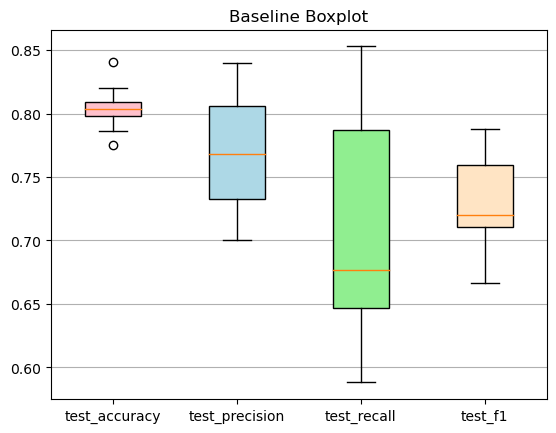

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_values, patch_artist = True,labels=cr_keys)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'bisque']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.plot()

Remembering the concepts of boxplot: The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box by 1.5x the inter-quartile range (IQR). Flier points are those past the end of the whiskers.

### B)Results Evaluation

Logistic regression is a interesting method to apply because we can acess the decision function and explain the result.

In [25]:
lr = LogisticRegression(**lr_parameters).fit(x_train, y_train['Survived'].to_numpy())

In [26]:
decision_func_dict = {feat_name: coef for feat_name, coef in zip(x_train.columns, lr.coef_.ravel())}
decision_func_dict['Interception'] = lr.intercept_[0]

In [27]:
decision_func_dict

{'Age': -1.1146603042328858,
 'Fare': 0.040108566976828956,
 'Pclass_1': 1.0649638090254048,
 'Pclass_2': 0.05125324678539386,
 'Pclass_3': -1.1165426428830514,
 'Sex_female': 1.2875473038679324,
 'Sex_male': -1.287872890940177,
 'Embarked_C': 0.08952923499285163,
 'Embarked_Q': 0.17857423650979334,
 'Embarked_S': -0.26842905857488314,
 'SibSp_0': 0.6876708650775968,
 'SibSp_1': 0.7582487797671482,
 'SibSp_2': 0.39923664677688087,
 'SibSp_3': -0.9097127366821947,
 'SibSp_4': -0.9357691420116633,
 'Parch_0': 0.08769980182433255,
 'Parch_1': 0.4186815638387896,
 'Parch_2': 0.05376954338400356,
 'Parch_3': -0.5604764961193676,
 'Interception': -0.47069257696080996}

The feature age is the most important, has a reverse influence on the classification. On the exploratory analysis we said that the end of the age range revealed a low chance of survival. Another interesting result is the pclass, we can see that the class has a high survival rate on pclass 1, the first class, and a low survival rate on pclass 3. the second class doesnt contribute to much on the classification. The sex feature on the exploratory analysis showed that woman is more like to survive. The fare has a positive contribution.

We can observe that the model is giving a good result because the results are explained by the exploratory analysis. This is the advantage in using the method logistic regression, the results are explanable by the coeficients. 

Lets plot the baseline.

In [28]:
cr

{'fit_time': array([0.00829458, 0.0082233 , 0.01027393, 0.00808215, 0.01064849,
        0.01322007, 0.00804424, 0.00681162, 0.00676465, 0.00731516]),
 'score_time': array([0.0059936 , 0.00543356, 0.0053401 , 0.00542998, 0.00553823,
        0.00508094, 0.00457048, 0.00412464, 0.00297356, 0.00298023]),
 'test_accuracy': array([0.78651685, 0.80898876, 0.7752809 , 0.82022472, 0.79775281,
        0.79775281, 0.80898876, 0.80898876, 0.79775281, 0.84090909]),
 'test_precision': array([0.74193548, 0.72972973, 0.76923077, 0.725     , 0.7       ,
        0.78571429, 0.81481481, 0.84      , 0.76666667, 0.8125    ]),
 'test_recall': array([0.67647059, 0.79411765, 0.58823529, 0.85294118, 0.82352941,
        0.64705882, 0.64705882, 0.61764706, 0.67647059, 0.76470588]),
 'test_f1': array([0.70769231, 0.76056338, 0.66666667, 0.78378378, 0.75675676,
        0.70967742, 0.72131148, 0.71186441, 0.71875   , 0.78787879])}

In [29]:
cr_values = list(cr.values())[2:]
cr_keys = list(cr.keys())[2:]

[]

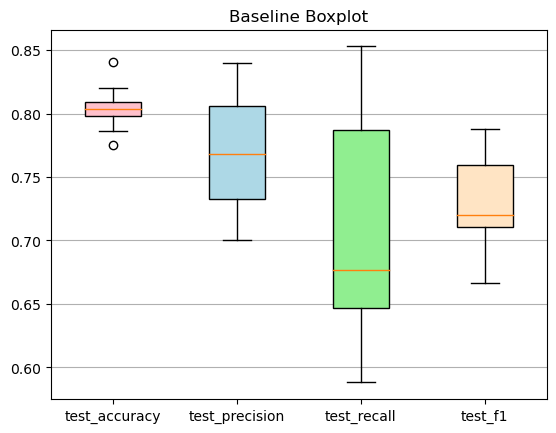

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_values, patch_artist = True,labels=cr_keys)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'bisque']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.plot()

Lets plot the baseline.

### C) Feature Selecting

More features will be added to the model in the future, so this part is important and will be more important in the future to test new features. Now we will select de best set of features. We have 19 features(columns), is impracticable test all the features, luckly there is a number of procedures to choose. The logistic regression has reliable coeficients for the features, we can use the coeficient to eliminate recursively the best set. The algorithm name is Recursive Feature Elimination.

The procedure Recursive feature elimination(RFE) starts with all the features available and will recursively eliminating the features with lowest impact based on the coeficients. The procedure will repeat util the best set is determined. 

In [38]:
from sklearn.feature_selection import RFECV

lr_model = LogisticRegression(**lr_parameters)
selector = RFECV(lr_model, step=1, cv=10, scoring = scorer[-1], n_jobs=-1)
selector = selector.fit(x_train, y_train['Survived'].to_numpy())

selector.ranking_

array([1, 8, 1, 7, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 5, 2, 6, 1])

In [39]:
best_features_lr = x_train.columns[selector.support_]

In [40]:
rank_features = {name: rank for name, rank in zip(x_train.columns, selector.ranking_)}
#sorting
rank_features = dict(sorted(rank_features.items(), key=lambda item: item[1]))

[]

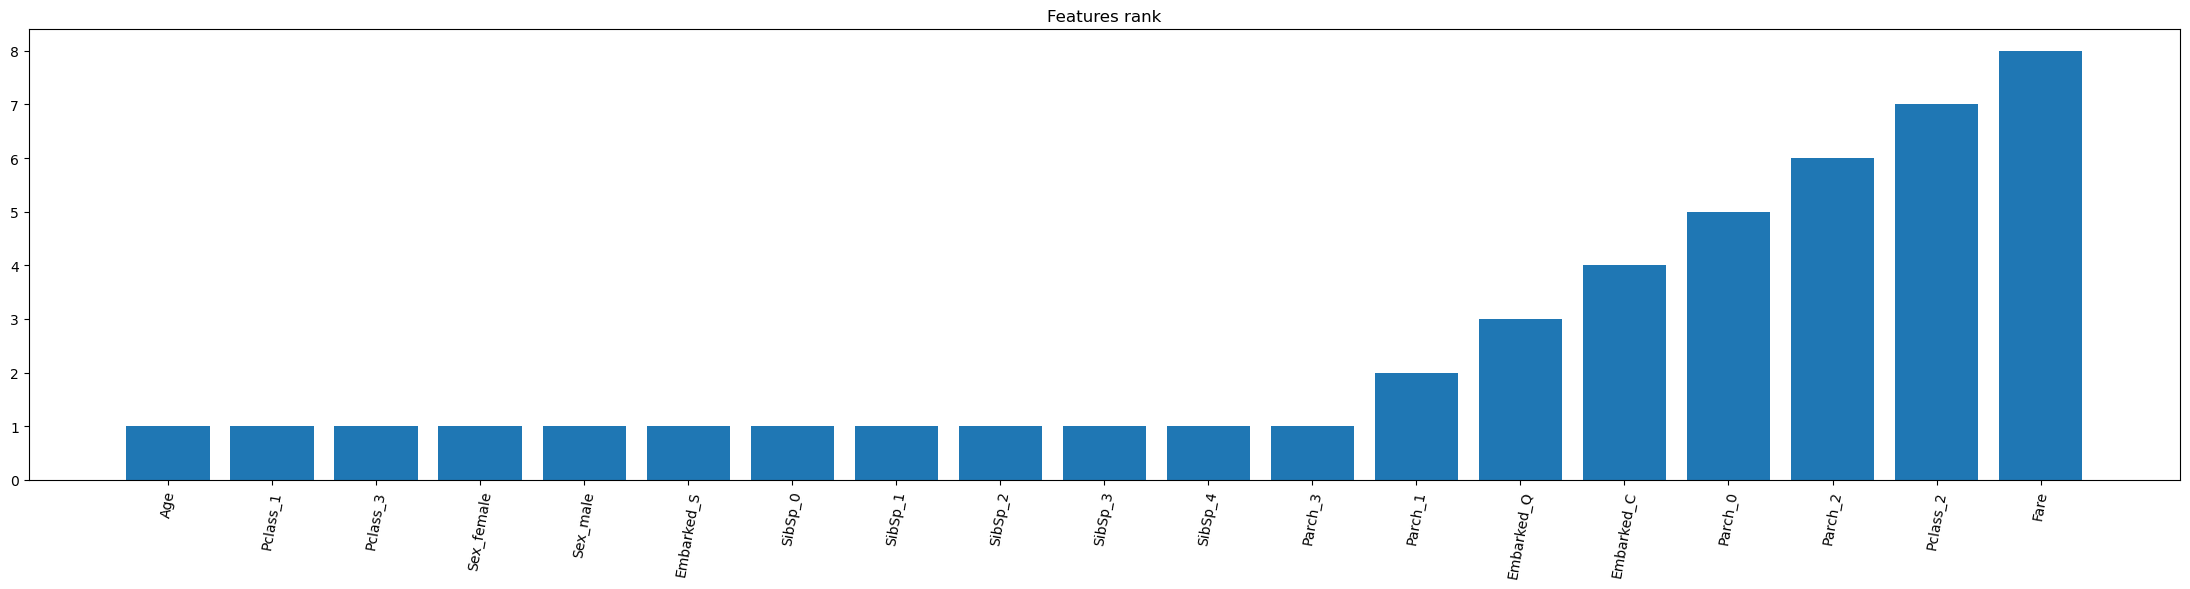

In [41]:
rf_values = list(rank_features.values())[:]
rf_keys = list(rank_features.keys())[:]

fig1, ax1 = plt.subplots(figsize = (22, 6))
ax1.set_title('Features rank')
bar = ax1.bar(rf_keys,rf_values)
plt.xticks(rotation=80)
plt.tight_layout()
plt.plot()

The plot shows the best features on group 1. Moreover, the procedure used to select the features is not perfect and errors can happen. The RFECV doesn't assure locate the best set of features. 

Let's see the scorer obtained by the best set of features and compare with a plain model without the selected features (orig set). 

[]

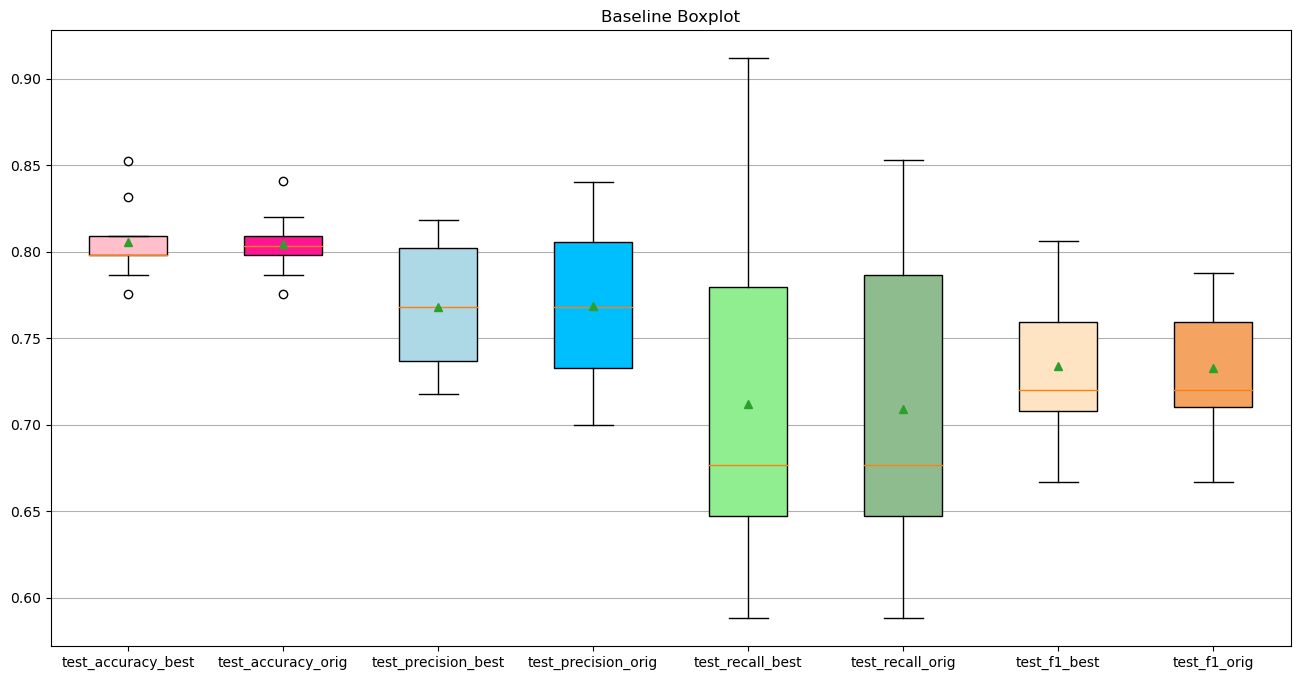

In [43]:
#lr_parameters = {'penalty': 'l2','solver':'liblinear','C':1,'tol': 1e-4 ,'n_jobs':None, 'max_iter':100 }
#Loading the original dataset
x_train_orig = pd.read_csv(f"{data_path}/x_train.csv", index_col = 0)
x_test_orig = pd.read_csv(f"{data_path}/x_test.csv", index_col = 0)

#Selecting the x_train_best
best_features_lr = x_train.columns[selector.support_]
x_train_best = x_train[best_features_lr]

#Modeling the best set.
lr_model = LogisticRegression(**lr_parameters)

#lr_model_best = TempClass(**lr_parameters) 
cr = cross_validate(lr_model, x_train_best, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_best = list(cr.values())[2:]
cr_keys_best = [f"{key}_best" for key in list(cr.keys())[2:]]

#Modeling the original.
cr = cross_validate(lr_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_orig = list(cr.values())[2:]
cr_keys_orig = [f"{key}_orig" for key in list(cr.keys())[2:]]

cr_values =  [[cr_best, cr_orig] for cr_best, cr_orig in zip(cr_values_best, cr_values_orig)]
cr_keys = [[cr_best, cr_orig] for cr_best, cr_orig in zip(cr_keys_best, cr_keys_orig)]
cr_val_list = []
for cval in cr_values:
    for cv in cval:
        cr_val_list.append(cv.ravel())
        
cr_keys = np.asarray(cr_keys).ravel()
fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink', 'lightblue', 'deepskyblue', 'lightgreen', 'darkseagreen', 'bisque', 'sandybrown']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.plot()

The best set and the original set gives almost the same results. Let's see the performance on the competition submitting the results of the model.

In [47]:
#prepare sub
def prepare_sub(model, x_train, y_train, x_test, message):
    
    model = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    sub = pd.read_csv("../data/test.csv")
    df_sub = pd.DataFrame(np.concatenate((sub['PassengerId'].to_numpy().reshape((1,-1)), y_test_pred.reshape((1, -1)))) ).transpose()
    df_sub.rename(columns= {0: 'PassengerId', 1: 'Survived'}, inplace=True)
    df_sub.to_csv('submit.csv', index=False)
    
    !kaggle competitions submit -c titanic -f 'submit.csv' -m 'Lr norm.Normal set'
    
    return

In [46]:
prepare_sub(lr_model, x_train[best_features_lr], y_train['Survived'].to_numpy(), x_test[best_features_lr], "")

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.06kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [48]:
prepare_sub(lr_model, x_train, y_train['Survived'].to_numpy(), x_test, "")

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 3.75kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

#### The normal set performs: 0.77272
#### The best set performs: 0.76794

The best set performs worst than the normal set. The results are very close to one another, the recursive elimination fails to locate the best set.

The final result is just a slight better for the best set. We can try another models, let's see the performance for an ensemble model, a variant of the random forest, the extremely randomized trees(Extra-trees). The extra-trees modify the random forest to make then more random, what justify the name extremely randomized. The default extra-trees doesn't limit the grow of the trees instead the method choose to increase the variance between the trees by increasing the randomness on the procedure of growth. More especificaly, the cutting points in the nodes is choosed randomly and evaluated by a metric, the best cutting point is selected. The default setup on sklearn doesn't use bootstrap(typical procedure on forests, which replace the original data-set with a replica of the data set), but we can choose to use. 

### E)Other Method (Extra-Trees)

In [49]:
#Interlace two list of the same size
def interlace(list1, list2):
    result = [None]*(len(list1)+len(list2))
    result[::2] = list1
    result[1::2] = list2
    return result

[]

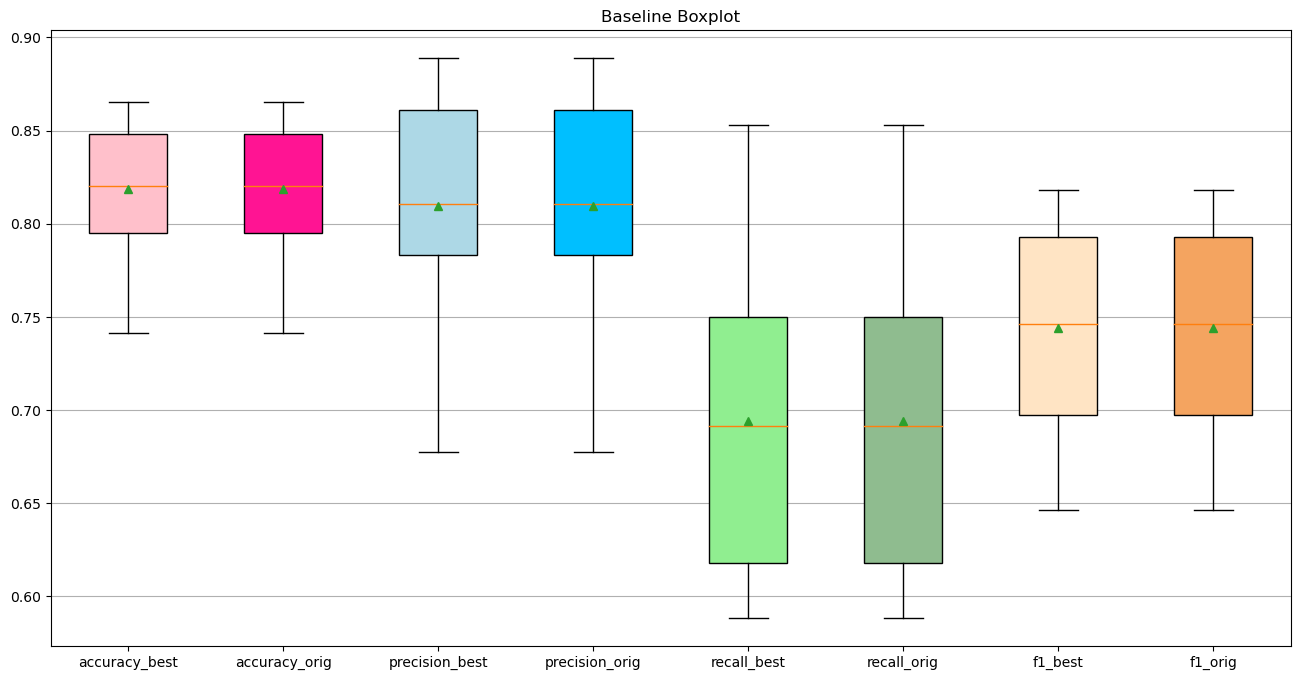

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
et_parameters = {'n_estimators':10, 'bootstrap':True , 'n_jobs':-1, 'min_samples_split':3 , 'min_impurity_decrease': 0.00001}
et_model = ExtraTreesClassifier(**et_parameters)
cr_score_names = ['accuracy', 'precision', 'recall', 'f1']

#Loading the original dataset
x_train_orig = pd.read_csv(f"{data_path}/x_train.csv", index_col = 0)
x_test_orig = pd.read_csv(f"{data_path}/x_test.csv", index_col = 0)

#Selecting the x_train_best
best_features = x_train.columns[selector.support_]
x_train_best = x_train[best_features]

#Modeling the best lr set.
cr_values_best = cross_validate(et_model, x_train_best, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_best = list(cr.values())[2:]
#cr_keys_best = [f"{key}_best" for key in list(cr.keys())]
#cr_values_best = get_cr_times(et_model, x_train_best, y_train['Survived'].to_numpy(), scorer)
cr_keys_best = [f"{key}_best" for key in list(cr_score_names)]


#Modeling the original.
cr_values_orig = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_orig = list(cr.values())[2:]
#cr_keys_orig = [f"{key}_orig" for key in list(cr.keys())[2:]]
#cr_values_orig = get_cr_times(et_model, x_train_orig, y_train['Survived'].to_numpy(), scorer, n=100)
cr_keys_orig = [f"{key}_orig" for key in list(cr_score_names)]

#Interlacing the lists to features set side by side presentation and by color

cr_val_list = interlace(cr_values_best, cr_values_orig)
cr_keys_list = interlace(cr_keys_best, cr_keys_orig)


fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys_list, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink', 'lightblue', 'deepskyblue', 'lightgreen', 'darkseagreen', 'bisque', 'sandybrown']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.plot()

The results is slight better compared to the logistic regression. This method also has a feature importance which we can use. The feature importance of the logistic regression is the coeficients on the equation, it's a pretty straightfoward way to acquire feature importance. On contrast, the feature importance on the extra-trees is a calculation on the nodes of the trees. The tree methods use a tree structure to classify the samples, each node of the tree has cutting on a feature, i.e., feature_1 <5, if true move the sample to right, else move the sample to left. The eficiency of the cut can be expressed by how much improvement is made by the cut rule. A cutting rule which separate perfectly the samples is better than one which separete the samples partially. This can generate a score and summing this score for each node we have the feature importance. So let's procced.

[]

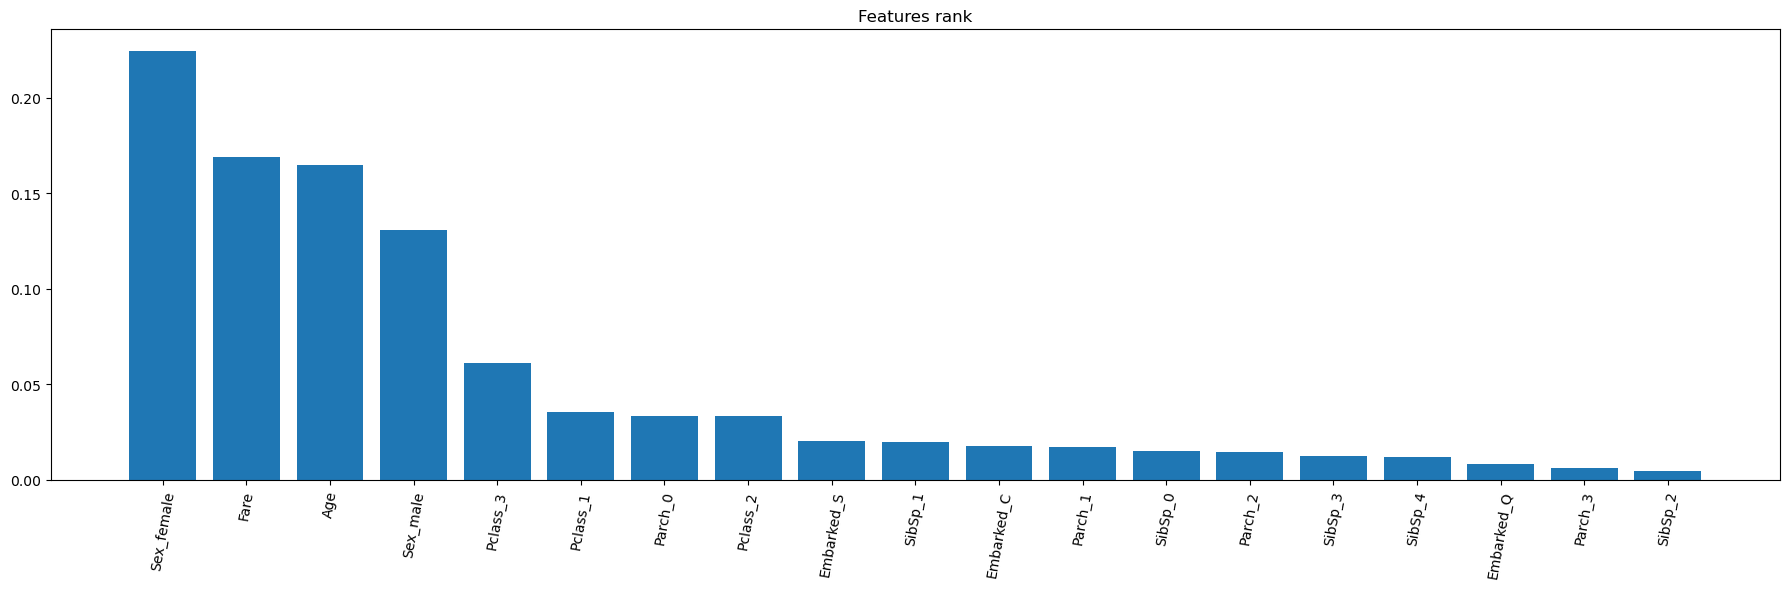

In [59]:
#modeling
et_model = et_model.fit(x_train, y_train['Survived'].to_numpy())
et_model.feature_importances_
et_model.feature_names_in_
rank_features = {name: rank for name, rank in zip(et_model.feature_names_in_, et_model.feature_importances_)}
#sorting
rank_features = dict(sorted(rank_features.items(), key=lambda item: item[1], reverse=True))

fig1, ax1 = plt.subplots(figsize = (18, 6))
ax1.set_title('Features rank')
bar = ax1.bar(rank_features.keys(),rank_features.values())
plt.xticks(rotation=80)
plt.tight_layout()
plt.plot()

The results is just a guide line, we cannot use this as a truth table. Let's see what the RFECV extract from these results.

In [61]:
from sklearn.feature_selection import RFECV
et_model = ExtraTreesClassifier(**et_parameters)
selector = RFECV(et_model, step=1, cv=10, scoring = scorer[-1], n_jobs=-1)
selector = selector.fit(x_train, y_train['Survived'].to_numpy())

selector.ranking_

array([ 1,  1,  1,  7,  1,  1,  1,  8, 11,  3,  5,  2, 13, 12,  9,  4,  6,
       10, 14])

In [62]:
rank_features = {name: rank for name, rank in zip(selector.feature_names_in_, selector.ranking_)}
#sorting
rank_features = dict(sorted(rank_features.items(), key=lambda item: item[1]))

[]

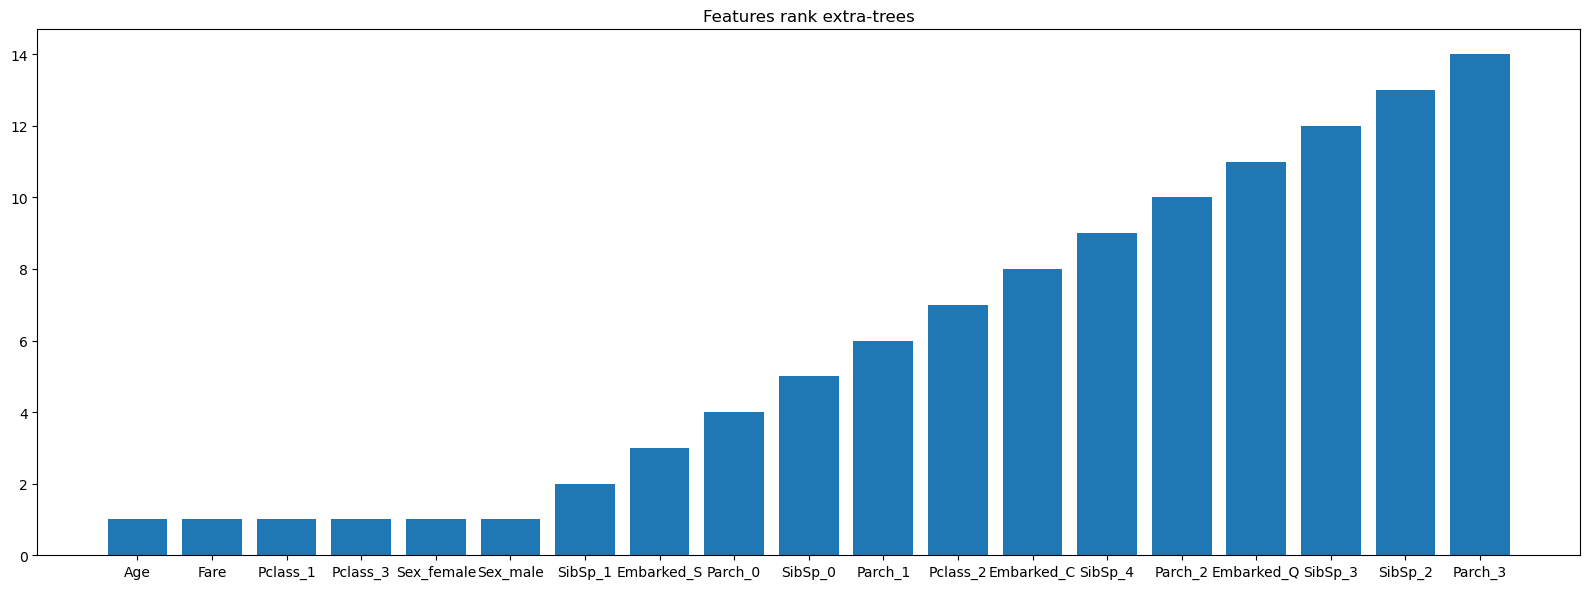

In [64]:
rf_values = list(rank_features.values())[:]
rf_keys = list(rank_features.keys())[:]

fig1, ax1 = plt.subplots(figsize = (16, 6))
ax1.set_title('Features rank extra-trees')
bar = ax1.bar(rf_keys,rf_values)
plt.tight_layout()
plt.plot()

In [65]:
best_features_et = x_train.columns[selector.support_]
len(best_features_et)
best_features_lr = x_train.columns[selector.support_]

6

In [66]:
#Interlace two list of the same size
def interlace(list1, list2, list3):
    result = [None]*(len(list1)+len(list2)+len(list3))
    result[::3] = list1
    result[1::3] = list2
    result[2::3] = list3
    return result

The extra-trees doesn't like to much the one hot encoding feature compared to the lr method. The RFECV isn't perfect to, let's test the result.

[]

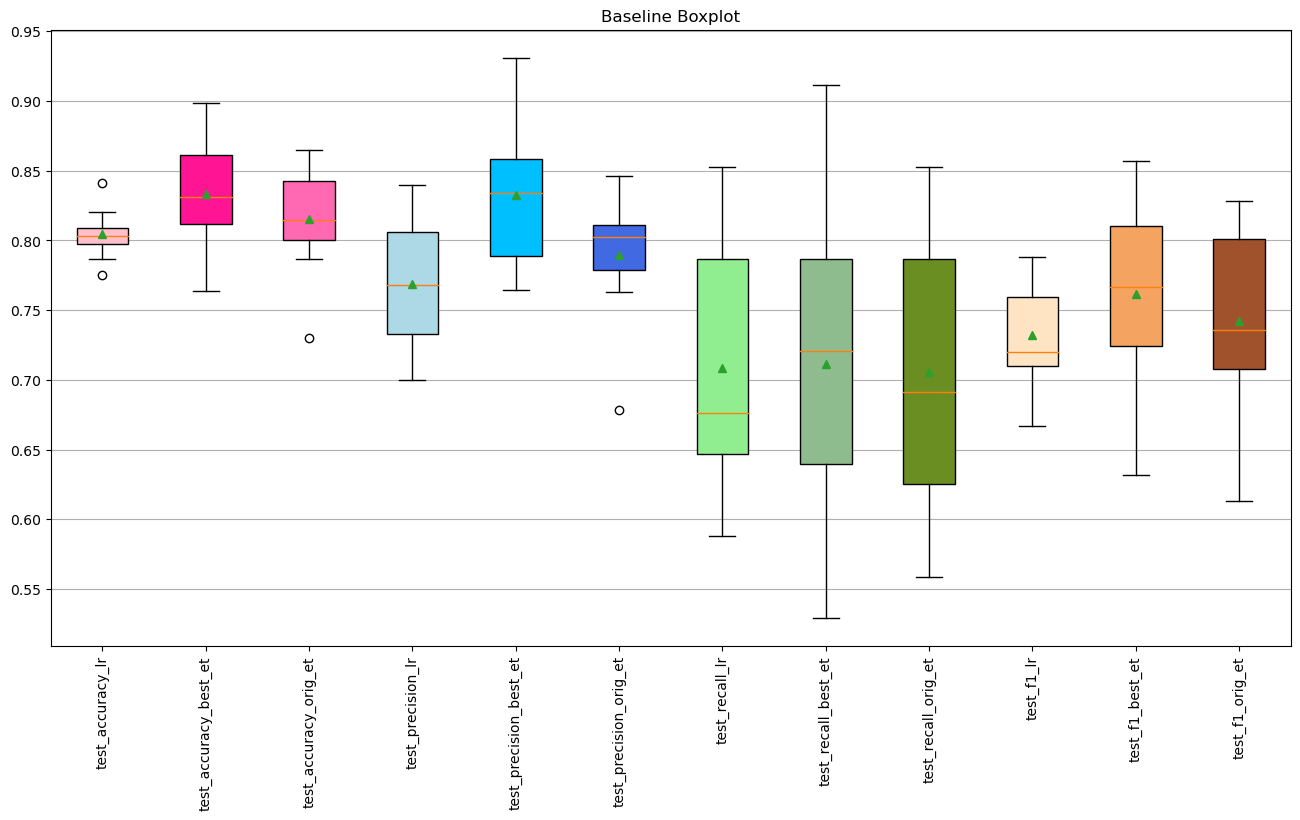

In [71]:
#Modeling the logistic regression.
lr_model = LogisticRegression(**lr_parameters)
cr = cross_validate(lr_model, x_train, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)

cr_values_lr = list(cr.values())[2:]
cr_keys_lr = [f"{key}_lr" for key in list(cr.keys())[2:]]

#Modeling the best set et.
cr = cross_validate(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_best = list(cr.values())[2:]
cr_keys_best = [f"{key}_best_et" for key in list(cr.keys())[2:]]

#Modeling the original.
cr = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring = scorer)
cr_values_orig = list(cr.values())[2:]
cr_keys_orig = [f"{key}_orig_et" for key in list(cr.keys())[2:]]

#interlace
cr_val_list = interlace(cr_values_lr, cr_values_best, cr_values_orig)
cr_keys = interlace(cr_keys_lr, cr_keys_best, cr_keys_orig)

fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink','hotpink', 'lightblue', 'deepskyblue', 'royalblue', 'lightgreen', 'darkseagreen','olivedrab', 'bisque', 'sandybrown', 'sienna']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=90)
plt.plot()

Extra-trees performs significantly better. Let's see if this translate to better peformance on competition.

In [72]:
#prepare sub
def prepare_sub(model, x_train, y_train, x_test, message):
    
    model = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    sub = pd.read_csv("../data/test.csv")
    df_sub = pd.DataFrame(np.concatenate((sub['PassengerId'].to_numpy().reshape((1,-1)), y_test_pred.reshape((1, -1)))) ).transpose()
    df_sub.rename(columns= {0: 'PassengerId', 1: 'Survived'}, inplace=True)
    df_sub.to_csv('submit.csv', index=False)
    
    !kaggle competitions submit -c titanic -f 'submit.csv' -m 'et best set'
    
    return

In [73]:
prepare_sub(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), x_test[best_features_et], "")

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 4.39kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

#### The score is Score: 0.76076
Much worst despite the better results on the cv. The methods lr and et is overfitting. Let's work on the overfitting looking at the training results and on the hyperparameters.

### D) Working with overfitting

Overfitting and underfitting is a trade-off and you can control the overfitting and underfitting by adjusting the hyperparameters on the models.

On the logistic regression the overfitting is controlled by the regularization strength, represented by the parameter C. The C is a inverse of the regularization strength, if C is larger than more the features on the equation can growth, in other words, less is the penalty applied. When the coeficients has large numbers, the decision function oscillates more, and more flexible is the model. We can think the flexibility of the model as the model trying to explain the data points, if the model is flexible enougth to explain all the data, the metrics will tell the model makes perfect predictions, but the model will not perform well on unseen data. This is a situation called overfitting, we are fitting so well on the data that our model only explains the situation present on the training data and performs poorly on unseen data. The contrary is also a bad behaviour and is called underfitting. 

On the extra-trees, we have multiple parameters to control de overfitting. Also, in extra-trees because the model works in an enseble fashion the problems with overfitting shouldn't be so harmful to the model because if one model is overfitting maybe other in the set of ensemble is not so applying a bigger number of estimator can help on this. However, we can also change the parameters of the growth of trees. Limiting the depth of the tree, number of sambles min required to consider a split, the change on the metric that the split of the node can produce, number of leafs.... The objective is don't let the tree make rules of split that split just a few samples. 

In a overall, we are trying to smooth the decision region produced by the model. 

Overfitting is not a thing that we try to avoid at all cost. Actually the overfitting is the first step when you are modeling. First your model has to prove that has the capacity of overfit the data. This is important beacause tells us that we are considering a good set of functions on the output space. Now we just have to adjust the hyperparameters to restrict the flexibility, producing a smooth model that will generalize better on unseen data.   

To work with the overfitting, let's plot the training error and restrict the flexibility of the model, trying to aproximate the training error with the test error. 

In [74]:
cr = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)

In [75]:
cr

{'fit_time': array([0.82722139, 0.28153467, 0.01023507, 0.0080905 , 0.0083611 ,
        0.00854135, 0.00900555, 0.00843215, 0.00827837, 0.0086062 ]),
 'score_time': array([0.01376891, 0.0120194 , 0.00783753, 0.00651407, 0.00793934,
        0.00881386, 0.00745368, 0.00821447, 0.00851488, 0.00661206]),
 'test_accuracy': array([0.79775281, 0.78651685, 0.7752809 , 0.83146067, 0.88764045,
        0.80898876, 0.80898876, 0.75280899, 0.83146067, 0.80681818]),
 'train_accuracy': array([0.9275    , 0.92      , 0.925     , 0.91625   , 0.91      ,
        0.91125   , 0.91625   , 0.90625   , 0.91375   , 0.91885144]),
 'test_precision': array([0.76666667, 0.77777778, 0.76923077, 0.73170732, 0.9       ,
        0.81481481, 0.81481481, 0.73076923, 0.80645161, 0.79310345]),
 'train_precision': array([0.93971631, 0.9384058 , 0.94244604, 0.92831541, 0.93014706,
        0.95019157, 0.90784983, 0.9391635 , 0.92473118, 0.94464945]),
 'test_recall': array([0.67647059, 0.61764706, 0.58823529, 0.88235294, 0.7

[]

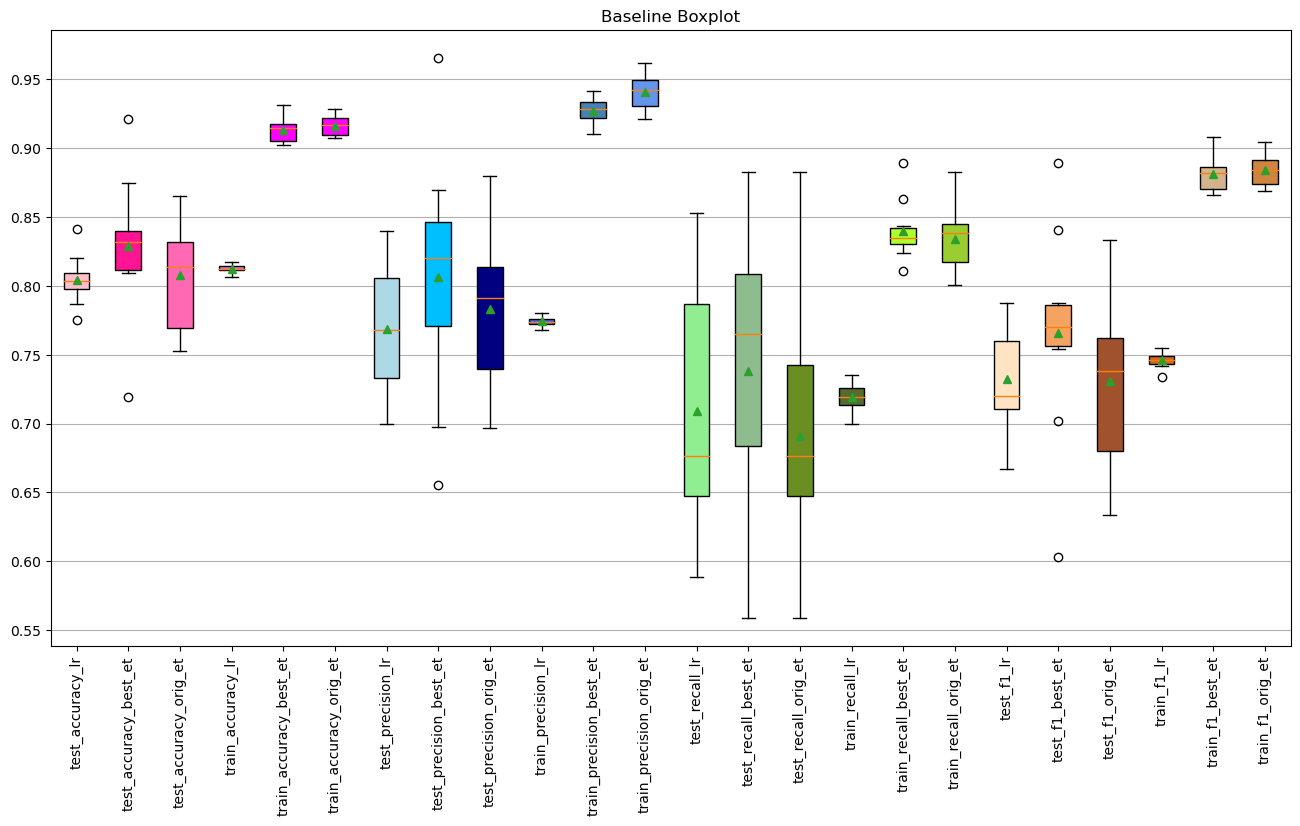

In [82]:
lr_parameters = {'n_jobs':-1, 'max_iter':900}
et_parameters = {'n_estimators':10, 'bootstrap':True , 'n_jobs':-1, 'min_samples_split':3 , 'min_impurity_decrease': 0.00001}


#Modeling the logistic regression.
lr_model = LogisticRegression(**lr_parameters)
cr = cross_validate(lr_model, x_train, y_train['Survived'].to_numpy(), cv=10, scoring = scorer, return_train_score=True)

cr_values_lr = list(cr.values())[2:]
cr_keys_lr = [f"{key}_lr" for key in list(cr.keys())[2:]]

#Modeling the best set et.
cr = cross_validate(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_best = list(cr.values())[2:]
cr_keys_best = [f"{key}_best_et" for key in list(cr.keys())[2:]]

#Modeling the original.
cr = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_orig = list(cr.values())[2:]
cr_keys_orig = [f"{key}_orig_et" for key in list(cr.keys())[2:]]

#interlace
cr_val_list = interlace(cr_values_lr, cr_values_best, cr_values_orig)
cr_keys = interlace(cr_keys_lr, cr_keys_best, cr_keys_orig)

fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink','hotpink','orchid', 'magenta', 'fuchsia',  'lightblue', 'deepskyblue','navy', 'royalblue', 'steelblue', 'cornflowerblue', 'lightgreen', 'darkseagreen','olivedrab','darkolivegreen', 'greenyellow','yellowgreen', 'bisque', 'sandybrown', 'sienna', 'chocolate', 'tan', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=90)
plt.plot()

We can seed that the logistic regression on the first and forth column is close with one another, in the other metrics besides the mean is close we can see a higher variance on the test set. With respect on the extra-trees, we can see that the training is much superior indicating a overfitting. Let's try to correct restricting the flexibility on the models.

[]

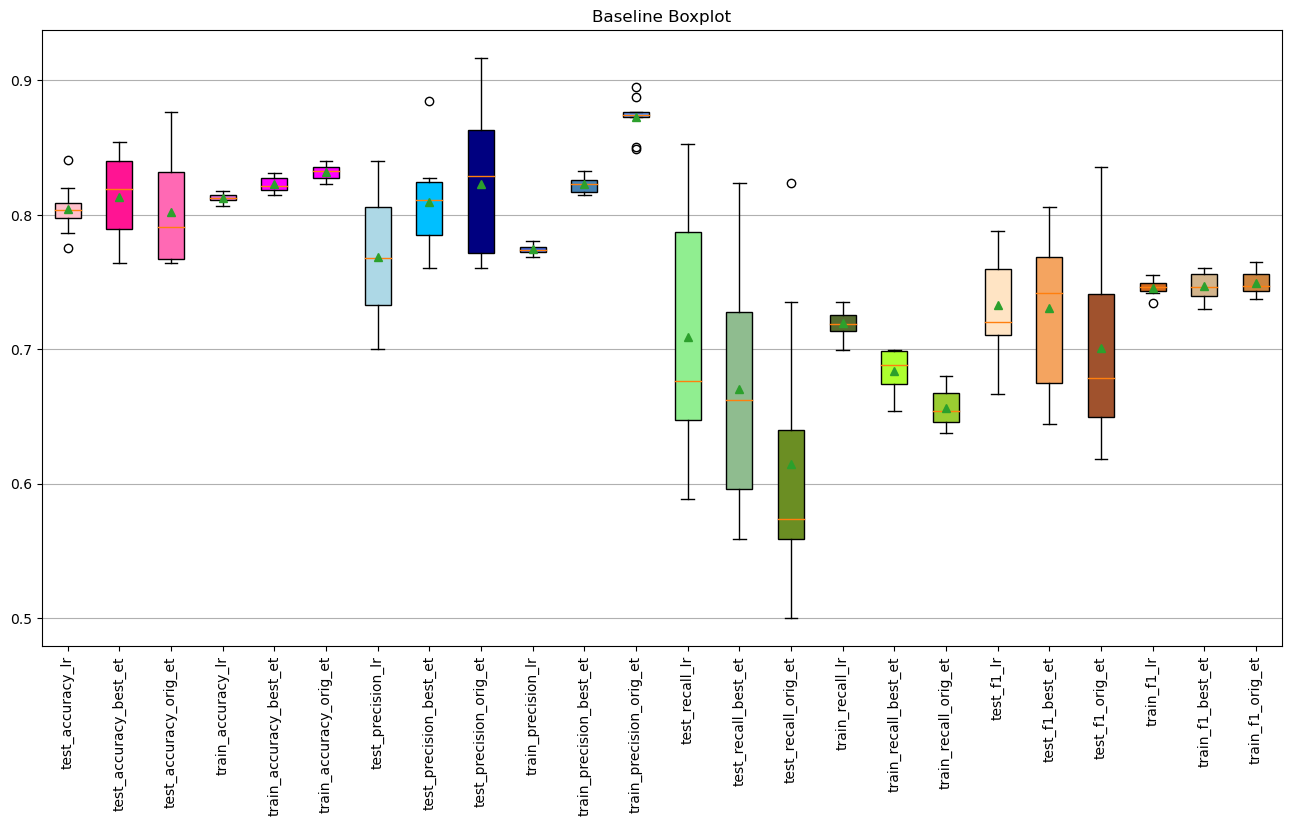

In [203]:
lr_parameters = {'n_jobs':-1, 'max_iter':900, 'C':1, 'tol': 1e-4}
et_parameters = {'n_estimators':1000, 'bootstrap':True , 'n_jobs':-1, 'max_depth': 10,  'min_samples_leaf':4 , 'min_impurity_decrease': 0.00001}

et_model = ExtraTreesClassifier(**et_parameters)

#Modeling the logistic regression.
lr_model = LogisticRegression(**lr_parameters)
cr = cross_validate(lr_model, x_train, y_train['Survived'].to_numpy(), cv=10, scoring = scorer, return_train_score=True)

cr_values_lr = list(cr.values())[2:]
cr_keys_lr = [f"{key}_lr" for key in list(cr.keys())[2:]]

#Modeling the best set et.
cr = cross_validate(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_best = list(cr.values())[2:]
cr_keys_best = [f"{key}_best_et" for key in list(cr.keys())[2:]]

#Modeling the original.
cr = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_orig = list(cr.values())[2:]
cr_keys_orig = [f"{key}_orig_et" for key in list(cr.keys())[2:]]

#interlace
cr_val_list = interlace(cr_values_lr, cr_values_best, cr_values_orig)
cr_keys = interlace(cr_keys_lr, cr_keys_best, cr_keys_orig)

fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink','hotpink','orchid', 'magenta', 'fuchsia',  'lightblue', 'deepskyblue','navy', 'royalblue', 'steelblue', 'cornflowerblue', 'lightgreen', 'darkseagreen','olivedrab','darkolivegreen', 'greenyellow','yellowgreen', 'bisque', 'sandybrown', 'sienna', 'chocolate', 'tan', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=90)
plt.plot()

In [204]:
#prepare sub
def prepare_sub(model, x_train, y_train, x_test, message):
    
    model = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    sub = pd.read_csv("../data/test.csv")
    df_sub = pd.DataFrame(np.concatenate((sub['PassengerId'].to_numpy().reshape((1,-1)), y_test_pred.reshape((1, -1)))) ).transpose()
    df_sub.rename(columns= {0: 'PassengerId', 1: 'Survived'}, inplace=True)
    df_sub.to_csv('submit.csv', index=False)
    
    !kaggle competitions submit -c titanic -f 'submit.csv' -m 'et norm.hyper'
    
    return

In [205]:
prepare_sub(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), x_test[best_features_et], "")

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.20kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

After the hyperparametrization, the training and testing become more similar. Nevertheless, no improvement was made on the competition score.

### F) Other methods of feature selecting

There is another methods for feature selecting that would be tested in this section. Note that the logistic regression with L1 is already selecting features, because of the intrisic caracteristic of the L1, the procedure L1 is a feature selection procedure too besides working also as a regularizer.

The next method is one of my favorites. The procedure name is Sequential Feature Selector (SFS). It's a simple test where we can begin in two diferent ways: We can start with one feature and test all possibles 1 feature sets, or we can start by setting the max possible set of features. The former is called forward way, and at each iteration one new feature is added on the group. In contrast, the second way is the backward, at each iteration one feature is removed. The algorithm stops when there is no improvement. The advantage on this procedure is that the features may interfer on others. On the other hand, the algorithm may test a great number of features and is not so fast than other procedures. Besides the algorithm does not assure encouter the best feature set. As we already said, the features interfer in one another, maybe the best set is revealed after adding two features ahead, but adding one does not give the best set in the interation, so the best set will not be found.

In [206]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs_et_fwrd = SequentialFeatureSelector(et_model, cv=10, scoring = 'f1', n_jobs=-1, direction='forward').fit(x_train, y_train['Survived'].to_numpy())
print('End sfs et fwrd!')
sfs_et_bkrd = SequentialFeatureSelector(et_model, cv=10, scoring = 'f1', n_jobs=-1, direction='backward').fit( x_train, y_train['Survived'].to_numpy())
print('End sfs et bkrd!')

/home/codemaster/anaconda3/envs/titanic/lib/python3.11/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


End sfs et fwrd!


/home/codemaster/anaconda3/envs/titanic/lib/python3.11/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


End sfs et bkrd!


In [207]:
sfs_et_fwrd

SequentialFeatureSelector(cv=10,
                          estimator=ExtraTreesClassifier(bootstrap=True,
                                                         max_depth=10,
                                                         min_impurity_decrease=1e-05,
                                                         min_samples_leaf=4,
                                                         n_estimators=1000,
                                                         n_jobs=-1),
                          n_jobs=-1, scoring='f1')

[]

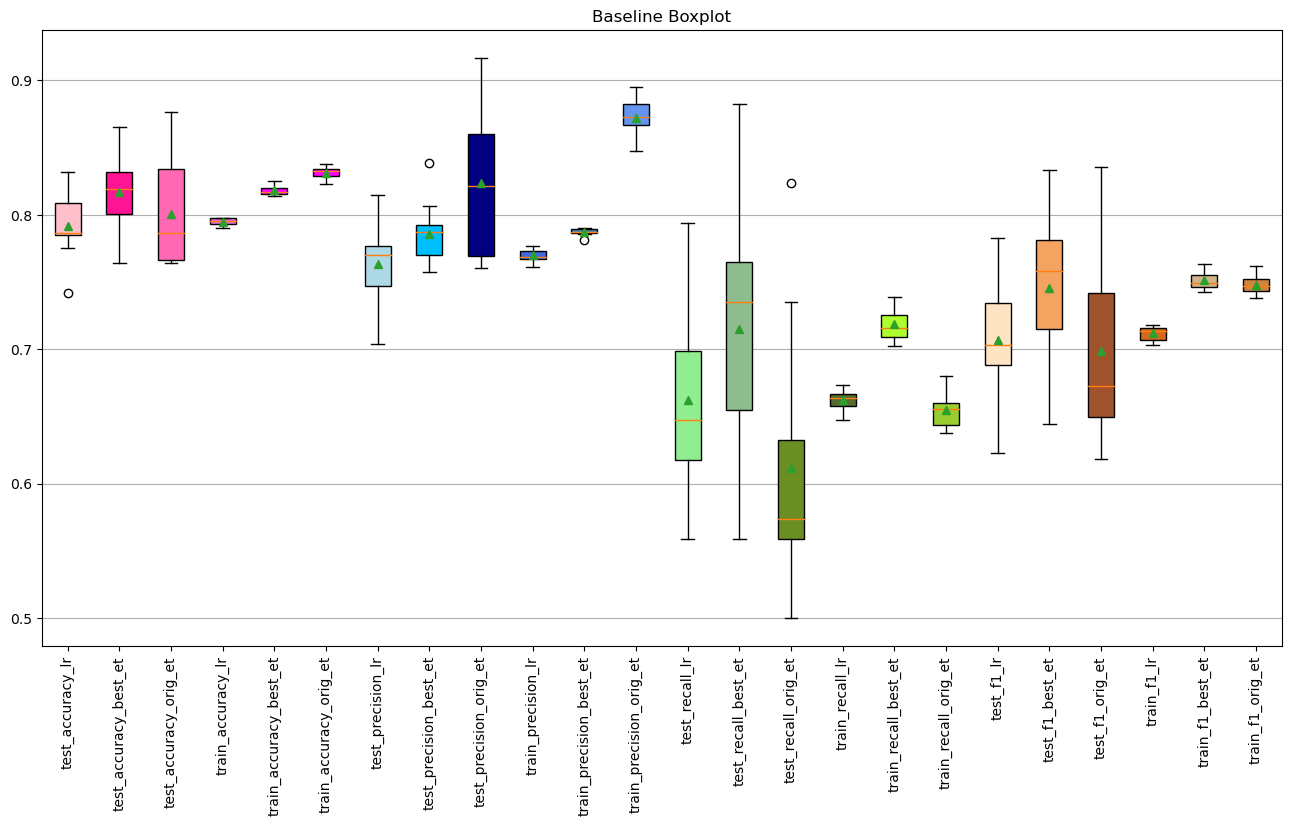

In [218]:
 


#Modeling the best set.
x_new = sfs_et_fwrd.transform(x_train)
lr_parameters = {'n_jobs':-1, 'max_iter':900, 'C':1, 'tol': 1e-4}
et_parameters = {'n_estimators':10000, 'bootstrap':True , 'n_jobs':-1, 'max_depth': 10,  'min_samples_leaf':4 , 'min_impurity_decrease': 0.00001}

et_model = ExtraTreesClassifier(**et_parameters)

#Modeling the logistic regression.
lr_model = LogisticRegression(**lr_parameters)
cr = cross_validate(lr_model, x_new, y_train['Survived'].to_numpy(), cv=10, scoring = scorer, return_train_score=True)

cr_values_lr = list(cr.values())[2:]
cr_keys_lr = [f"{key}_lr" for key in list(cr.keys())[2:]]

#Modeling the best set et.
cr = cross_validate(et_model,x_new, y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_best = list(cr.values())[2:]
cr_keys_best = [f"{key}_best_et" for key in list(cr.keys())[2:]]

#Modeling the original.
cr = cross_validate(et_model, x_train_orig, y_train['Survived'].to_numpy(), cv=10, scoring=scorer, return_train_score=True)
cr_values_orig = list(cr.values())[2:]
cr_keys_orig = [f"{key}_orig_et" for key in list(cr.keys())[2:]]

#interlace
cr_val_list = interlace(cr_values_lr, cr_values_best, cr_values_orig)
cr_keys = interlace(cr_keys_lr, cr_keys_best, cr_keys_orig)

fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_title('Baseline Boxplot')
bplot = ax1.boxplot(cr_val_list ,labels = cr_keys, patch_artist = True, showmeans =True)
ax1.yaxis.grid(True)
# fill with colors
colors = ['pink','deeppink','hotpink','orchid', 'magenta', 'fuchsia',  'lightblue', 'deepskyblue','navy', 'royalblue', 'steelblue', 'cornflowerblue', 'lightgreen', 'darkseagreen','olivedrab','darkolivegreen', 'greenyellow','yellowgreen', 'bisque', 'sandybrown', 'sienna', 'chocolate', 'tan', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=90)
plt.plot()

In [219]:
#prepare sub
def prepare_sub(model, x_train, y_train, x_test, message):
    
    model = model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    sub = pd.read_csv("../data/test.csv")
    df_sub = pd.DataFrame(np.concatenate((sub['PassengerId'].to_numpy().reshape((1,-1)), y_test_pred.reshape((1, -1)))) ).transpose()
    df_sub.rename(columns= {0: 'PassengerId', 1: 'Survived'}, inplace=True)
    df_sub.to_csv('submit.csv', index=False)
    
    !kaggle competitions submit -c titanic -f 'submit.csv' -m 'et sfs et bkrd'
    
    return

In [205]:
prepare_sub(et_model, x_train[best_features_et], y_train['Survived'].to_numpy(), x_test[best_features_et], "")

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.20kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

#### extra trees sfs
#### bkwrd score:0.77751
#### fwrd score: 0.77751

### E)Conclusion

With overfitting or without the overfitting the model doesn't perform better than the last result. For further improvements, the data preparation stage has to implement new features and on the features representation. The propose of the first version was to implement a base line. Now with the structure developed, we can try to improve with new features and the representation of the features. 